<a href="https://colab.research.google.com/github/rishab-98/Face-Recognition/blob/master/FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=f087fe0843fd5578820d444dab563782664a11572b1b3f092ce4dc5bd5a0e6b2
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import face_recognition
import cv2

In [ ]:
import os
from google.colab.patches import cv2_imshow

In [ ]:
def read_img(path):
  img =cv2.imread(path)
  (h,w)=img.shape[:2]
  width=500
  ratio=width/float(w)
  height=int(ratio*h)
  return cv2.resize(img,(width,height))

In [ ]:
known_dir='known'
unknown_dir='unknown'

In [ ]:
!mkdir known
!mkdir unknown


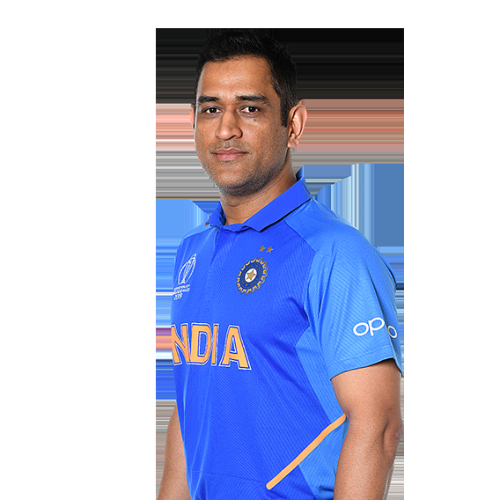

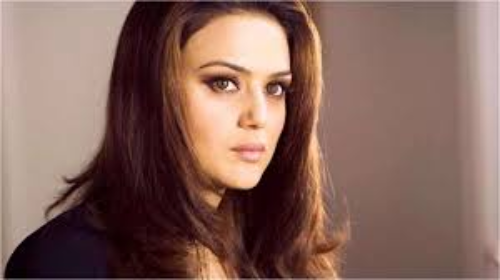

2


In [ ]:
known_encodings=[]
known_names=[]
for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])
  cv2_imshow(img)


print(len(known_encodings))
 


In [ ]:
for file in os.listdir(unknown_dir):
  print("Processing",file)
  img = read_img(unknown_dir + '/' + file)
  img_enc= face_recognition.face_encodings(img)[0]
  results=face_recognition.compare_faces(known_encodings, img_enc)
  print(results)
  print(face_recognition.face_distance(known_encodings, img_enc))
  for i in range(len(results)):
      if results[i]:
         print(known_names[i])
      if results[i]:
        name=known_names[i]
        (top, right, bottom, left)=face_recognition.face_locations(img)[0]
        cv2.rectangle(img, (left, top), (right, bottom), (255,0,255), 2)
        cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_COMPLEX, 0.8, (255,255,255),1)
        cv2_imshow(img)
      

Processing img1.jpg
[False, False]
[0.84580158 0.70628937]
Processing IMG-20180331-WA0023.jpg
[False, False]
[0.82851664 0.69448006]
Processing preity1_013117113751.jpg
[False, False]
[0.82566042 0.67900885]
